#### imports

In [1]:
1

1

In [2]:
from annoy import AnnoyIndex
from fastai.vision.all import *
from mytools.tools import *
from fur.paths import *

from fur.learn import *
from IPython.display import Image,display
import requests

In [3]:
model_path = models_path/'model_sofas_styles__color_singlelabel_stable'

In [4]:
# model_path =models_path/path_info(models_path).sort_values(['time'])['name'].iloc[-1];model_path

In [5]:
model_path.ls()

[Path('/home/dima/furniture_data/models/model_sofas_styles__color_singlelabel_stable/.ipynb_checkpoints'),
 Path('/home/dima/furniture_data/models/model_sofas_styles__color_singlelabel_stable/test.ann'),
 Path('/home/dima/furniture_data/models/model_sofas_styles__color_singlelabel_stable/feature_dict.pkl'),
 Path('/home/dima/furniture_data/models/model_sofas_styles__color_singlelabel_stable/model.pkl')]

In [6]:
len(model_path.ls())

4

In [7]:
learn = load_learner(model_path/'model.pkl')

sf = SaveFeatures(learn.model[1][7])

t = AnnoyIndex(512, 'euclidean')
t.load(str(model_path/'test.ann'))

feature_dict = from_pickle(model_path/'feature_dict.pkl')

In [8]:
t.get_n_items()

3696

In [9]:
models_path

Path('/home/dima/furniture_data/models')

In [10]:
len(feature_dict)

3696

#### predict

In [20]:
pred_item_url = 'https://ladya.ru/upload/iblock/bf1/bf10ac2b7c9eb9b68d44c58c03761808.jpg'
save_file_from_url(pred_item_url, 'pred.jpg')

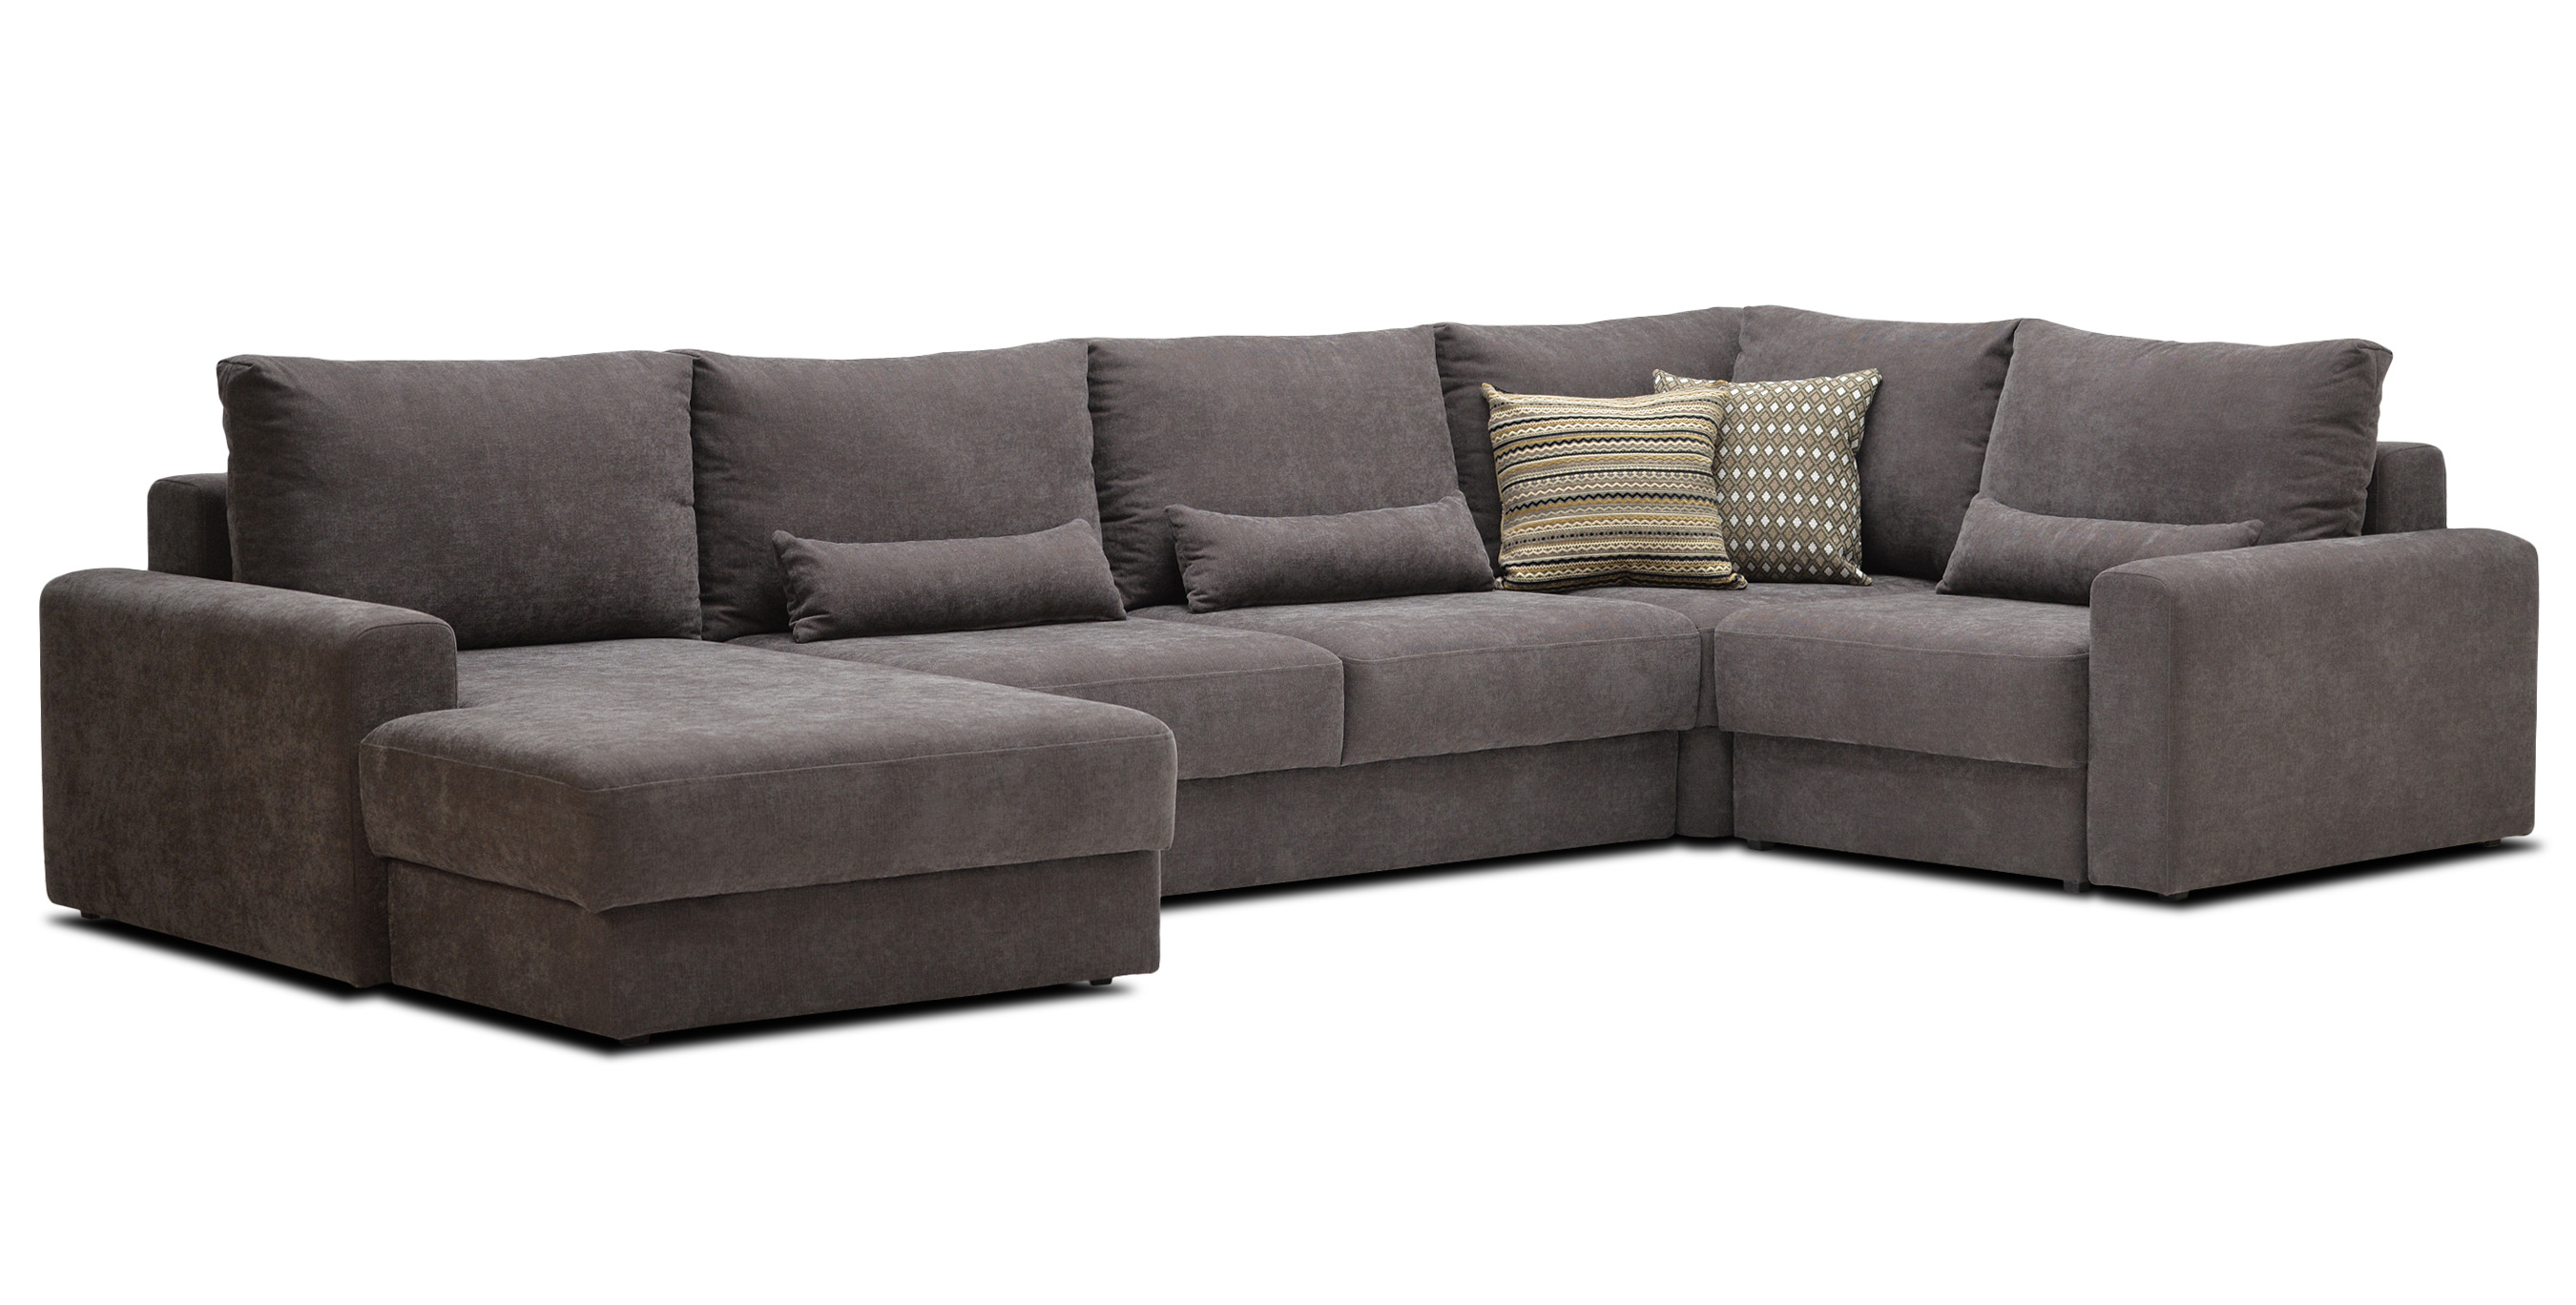

In [21]:
Image(filename ='pred.jpg', width=500, height=500)

In [22]:
pred = learn.predict('pred.jpg');pred[0]

'grey,Transitional'

In [23]:
len(sf.features)

2

In [24]:
similar = t.get_nns_by_vector(sf.features[-1], 5, include_distances=False)

In [25]:
similar

[2221, 1470, 2148, 3031, 3073]

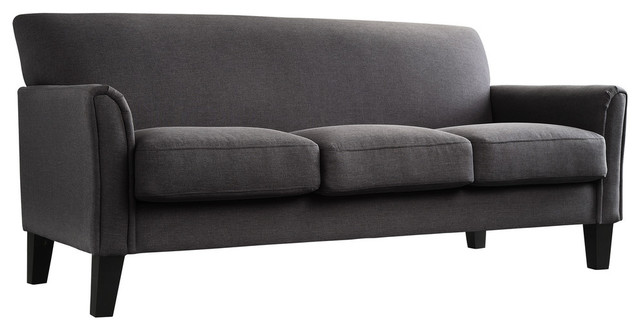

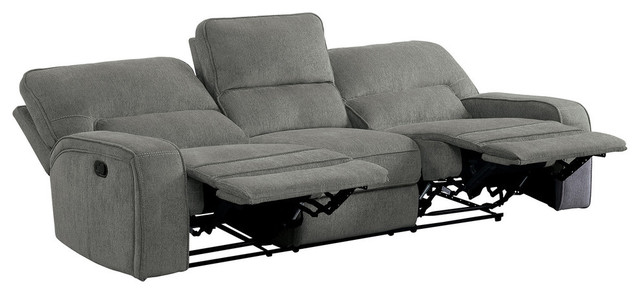

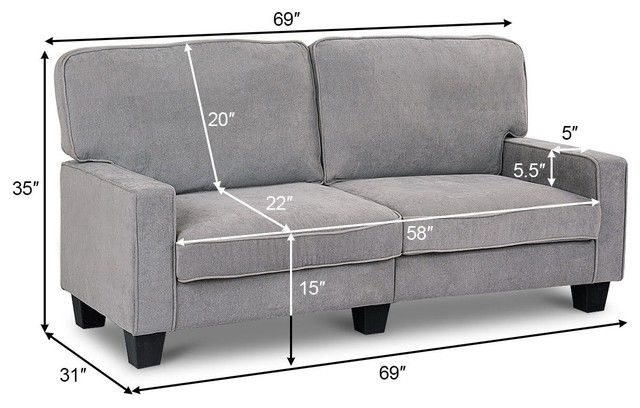

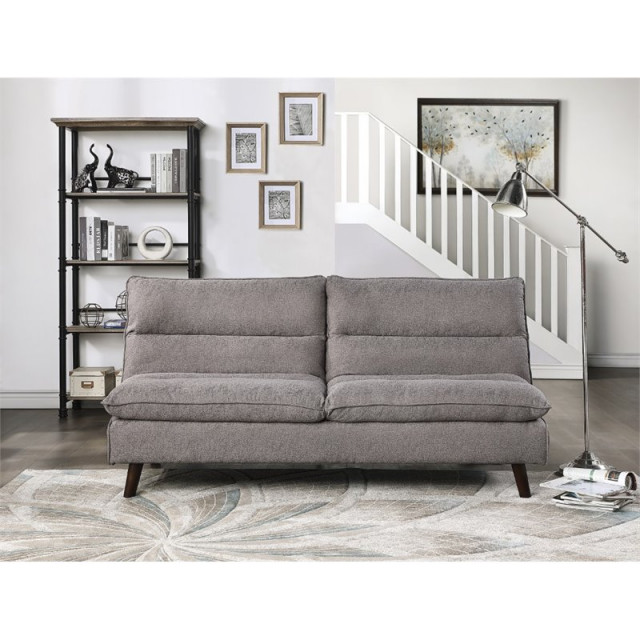

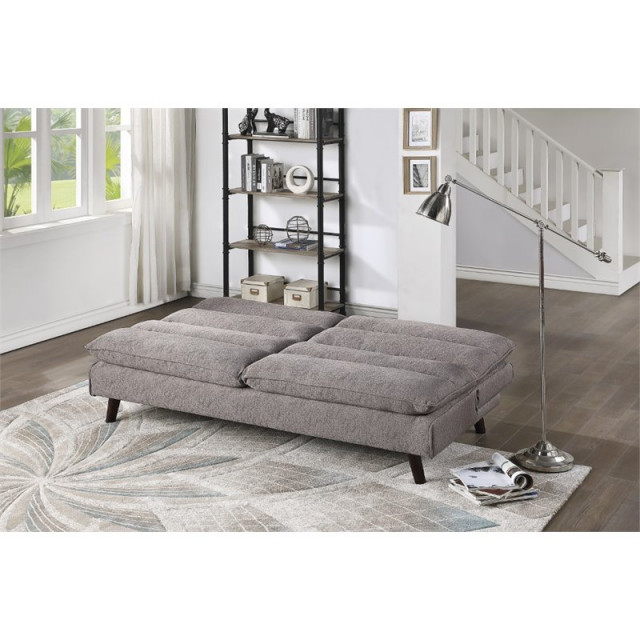

In [26]:
for i in similar:
    display(Image(filename =ssd_pictures_path/list(feature_dict.keys())[i], width=500, height=500))